In [2]:
%matplotlib inline

%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path = ["../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['../', '../', '/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../pIMZ/__init__.py


In [3]:
! ls /mnt/s/data/globus_win/

d9e3c80a32567cde9b61e38ce8693559  f1fc56fe8e39a9c05328d905d1c4498e


In [4]:
! ls /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML

VAN0010-LK-155-40-IMS_PosMode.ibd
VAN0010-LK-155-40-IMS_PosMode.imzML
VAN0010-LK-155-40-IMS_PosMode.imzML.regions


In [7]:
! rm /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML.regions

In [5]:
imze_male = IMZMLExtract("/mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML")

Opening regions file for /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML
1 1 1 1342 1342
2 501 2163 569 842
3 2489 2489 1 1


1 ((1, 1, 1342, 1342), 1)
2 ((501, 2163, 569, 842), 393413)
3 ((2489, 2489, 1, 1), 1)


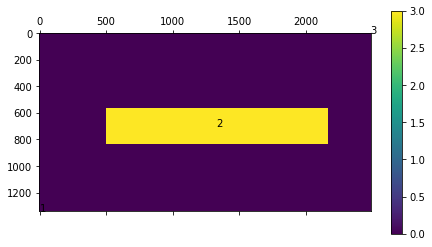

{1: ((1, 1, 1342, 1342), 1),
 2: ((501, 2163, 569, 842), 393413),
 3: ((2489, 2489, 1, 1), 1)}

In [6]:
imze_male.list_regions()

In [7]:
male_spectra2_orig = imze_male.get_region_array(2, makeNullLine=True)

Fetching region range
Fetching region shape
Found region 2 with shape (1663, 274, 61)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|


In [8]:
male_spectra2_intra = imze_male.normalize_region_array(male_spectra2_orig, normalize="intra_median")
male_spectra2 = imze_male.normalize_region_array(male_spectra2_intra, normalize="inter_median")

Started Log Value: 100.0
100% |########################################################################|
Got 393077 median-enabled pixels
5-Number stats for medians: (455662, 393077, 0.0, 0.6269781461944235, 0.8544891640866873, 1.079016691698337, 2.958079409048938)
Started Log Value: 118.63738632202148
100% |########################################################################|
Got a total of 27795382 fold changes
Median elements [13897691]
Median elements
Global Median 0.79762


Started Log Value: 100.0


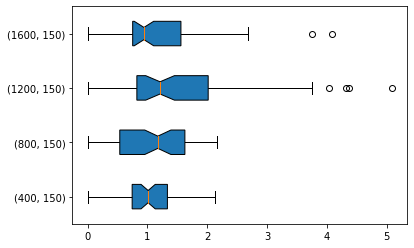

In [9]:
imze_male.plot_fcs(male_spectra2_orig, [(400,150), (800,150), (1200,150), (1600, 150)])

Started Log Value: 148.73923211807815


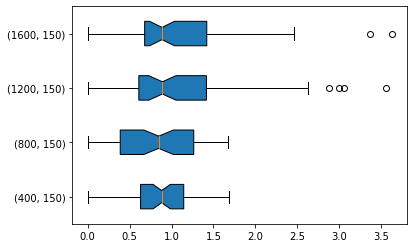

In [10]:
imze_male.plot_fcs(male_spectra2, [(400,150), (800,150), (1200,150), (1600, 150)])

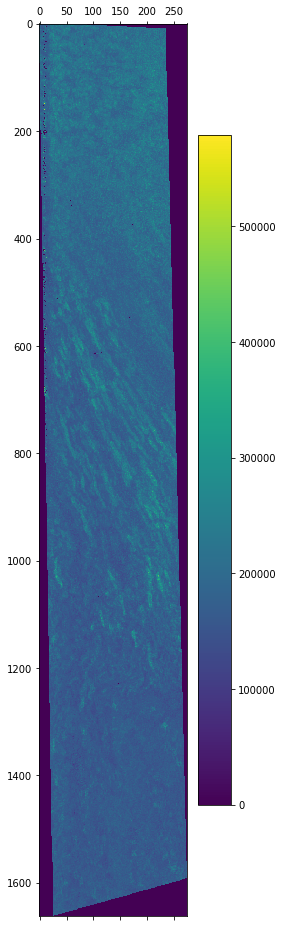

In [11]:
imze_male.plot_toc(male_spectra2)

In [12]:
male_spec = SpectraRegion(np.log(male_spectra2+1), imze_male.mzValues)

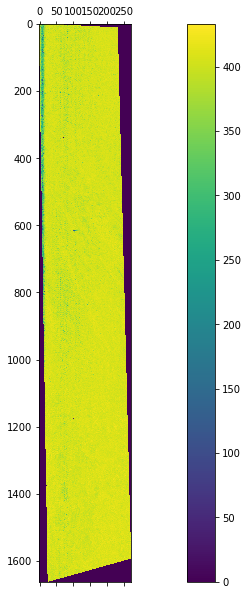

In [13]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

2020-10-21 18:40:13,050  SpectraRegion  INFO: Processing Mass 703 with best existing mass 703.57470703125


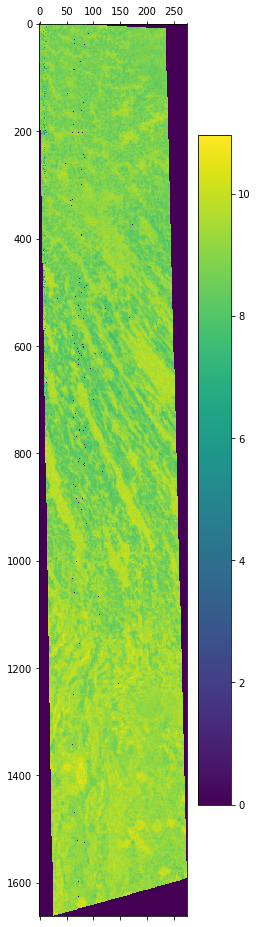

In [14]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.mass_heatmap(703)
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [15]:
male_spec.segment(method="UMAP_DBSCAN", number_of_regions=6, min_cluster_size=9, num_samples=10000)

2020-10-21 18:40:13,446  SpectraRegion  INFO: Calculating clusters
2020-10-21 18:40:13,448  SpectraRegion  INFO: Elem Matrix of shape: (455662, 61)
2020-10-21 18:40:13,864  SpectraRegion  INFO: UMAP reduction
2020-10-21 18:49:56,679  SpectraRegion  INFO: HDBSCAN reduction
2020-10-21 18:49:56,681  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (10000, 2)
2020-10-21 18:49:57,061  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (455662, 2)
2020-10-21 18:54:16,868  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (455662, 121)
2020-10-21 18:54:16,868  SpectraRegion  INFO: HDBSCAN Soft Clusters: (455662, 121)
2020-10-21 18:54:16,870  SpectraRegion  INFO: HDBSCAN Labeling


[[3.59975798e-06 3.11287608e-06 2.88483257e-06 ... 5.09994581e-06
  4.64469187e-06 5.38328254e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.70503370e-04
  3.15496149e-04 3.27070236e-04]
 [8.39860461e-09 6.35535880e-09 7.43704397e-09 ... 1.45832974e-08
  2.55722467e-08 9.99998801e-01]
 ...
 [9.99990547e-01 5.80407072e-08 6.46846424e-08 ... 7.85213351e-08
  8.44647769e-08 9.97075411e-08]
 [9.99999768e-01 1.41812111e-09 1.57424617e-09 ... 1.92049032e-09
  2.06139539e-09 2.43423562e-09]
 [8.99440398e-01 8.95977416e-10 9.92329453e-10 ... 1.20575124e-09
  1.29030722e-09 1.51384254e-09]]


2020-10-21 18:54:17,496  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-10-21 18:54:17,496  SpectraRegion  INFO: Cluster Reduction
2020-10-21 18:54:17,497  SpectraRegion  INFO: Calculating consensus spectra
2020-10-21 18:54:18,238  SpectraRegion  INFO: Setting consensus spectra
2020-10-21 18:54:18,238  SpectraRegion  INFO: Calculating consensus spectra done
2020-10-21 18:54:18,608  SpectraRegion  INFO: Calculating clusters done
2020-10-21 18:54:18,858  SpectraRegion  INFO: Calculating clusters saved


array([[6, 4, 6, ..., 2, 2, 2],
       [6, 6, 5, ..., 2, 2, 2],
       [6, 6, 4, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 4, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int16)

In [17]:
#male_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=1000)

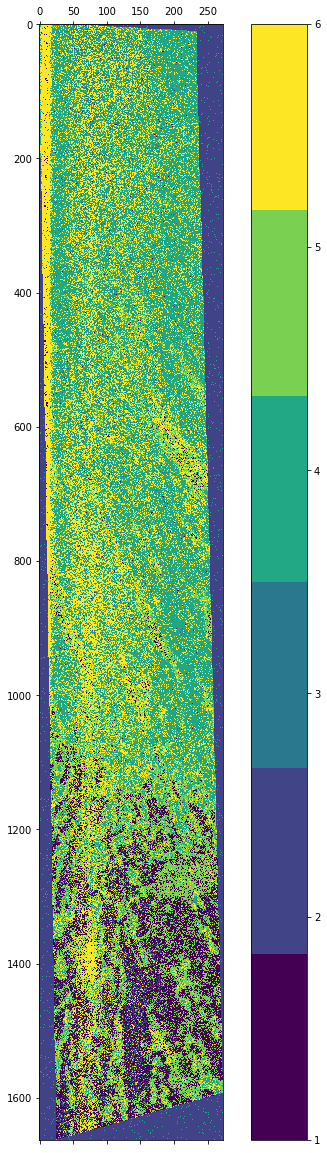

In [17]:
mpl.rcParams['figure.figsize'] = (10,20)
male_spec.plot_segments()

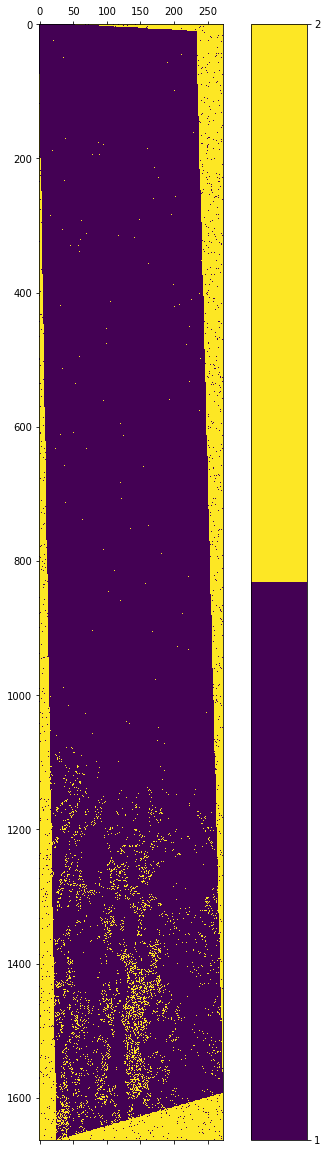

In [18]:
male_spec.plot_segments(highlight=[2])

In [19]:
male_spec.set_background(2)

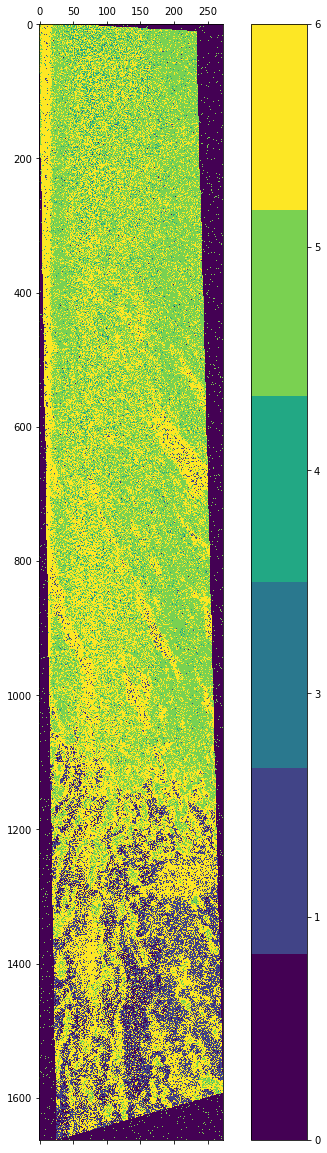

In [20]:
male_spec.plot_segments()

In [21]:
male_spec.list_segment_counts()

0 :  69354
1 :  45791
3 :  14804
4 :  154740
5 :  66031
6 :  104942


2020-10-21 19:15:13,164  SpectraRegion  INFO: Pixels    : 455662
2020-10-21 19:15:13,165  SpectraRegion  INFO: Unassigned: 0


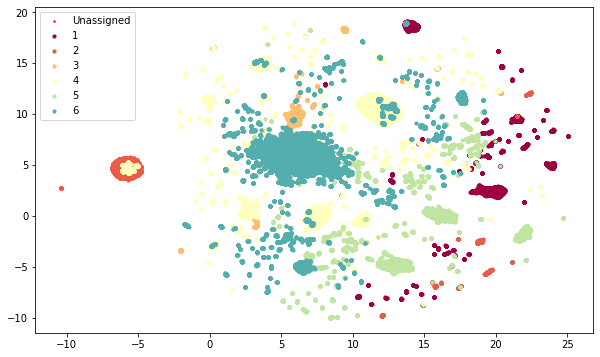

In [22]:
mpl.rcParams['figure.figsize'] = (10,6)
male_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

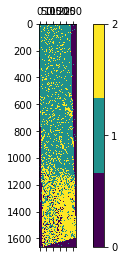

In [28]:
male_spec.plot_segments(highlight=[1,3,5])

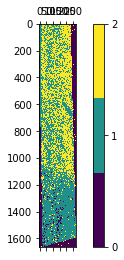

In [27]:
male_spec.plot_segments(highlight=[4])

In [29]:
resdf, expr, pdata = male_spec.find_markers([1,3,5], [4] , use_methods=["ttest"], sample_max = 10000)

2020-10-21 19:16:38,702  SpectraRegion  INFO: DE data for case: [1, 3, 5]
2020-10-21 19:16:38,703  SpectraRegion  INFO: DE data for control: [4]
2020-10-21 19:16:38,703  SpectraRegion  INFO: Running [1, 3, 5] against [4]
2020-10-21 19:16:38,704  SpectraRegion  INFO: DE result key: ((1, 3, 5), (4,))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-10-21 19:17:36,634  SpectraRegion  INFO: DE DataFrame ready. Shape (61, 40000)
2020-10-21 19:17:36,653  SpectraRegion  INFO: DE Sample DataFrame ready. Shape (40000, 3)
2020-10-21 19:17:36,659  SpectraRegion  INFO: Performing DE-test: ttest
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warning

In [33]:
resdf = male_spec.get_de_result("ttest", ((1,3,5), (4,)))

In [34]:
annotDF = male_spec.deres_to_df("ttest", ((1,3,5), (4,)), None, keepOnlyProteins=False, inverse_fc=False)

2020-10-21 19:29:02,382  SpectraRegion  INFO: DE result for case ((1, 3, 5), (4,)) with (61, 7) results
2020-10-21 19:29:02,383  SpectraRegion  INFO: DF column names ['gene', 'pval', 'qval', 'log2fc', 'mean', 'zero_mean', 'zero_variance']
2020-10-21 19:29:02,395  SpectraRegion  INFO: DE result for case ((1, 3, 5), (4,)) with (3, 7) results (filtered)
2020-10-21 19:29:02,898  SpectraRegion  INFO: Created matrices with shape (126626, 61) and (154740, 61) (target, bg)


In [35]:
annotDF

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,1_3_5,mass_757_6222,757.6222,,-1,-1.158241,0.0,126626,110916,4.581762,5.205341,154740,63377,1.735703,0.000000
1,1_3_5,mass_805_6799,805.6799,,-1,0.779259,0.0,126626,64652,2.541300,2.491432,154740,151665,5.531191,5.713314
2,1_3_5,mass_833_7094,833.7094,,-1,0.801037,0.0,126626,62860,2.485558,0.000000,154740,151734,5.603376,5.774002


In [36]:
! mkdir deresults_hubmap

In [37]:
for x in male_spec.df_results_all:
    for y in male_spec.df_results_all[x]:
        if x != "ttest":
            continue
        
        print(x,y)
        
        male_spec.export_deres(x, y, "./deresults_hubmap/deres.{}.{}.html".format("_".join([str(j) for j in y[0]]), "_".join([str(j) for j in y[1]])))
        

2020-10-21 19:29:50,282  SpectraRegion  INFO: Fetching Mass Heatmaps for all 3 required masses


ttest ((1, 3, 5), (4,))


2020-10-21 19:31:14,767  SpectraRegion  INFO: Adding Mass Heatmap at pos 3 of 15 with 3 entries
2020-10-21 19:31:14,768  SpectraRegion  INFO: Got Columns: [('clusterID', '"string"'), ('gene_ident', '"string"'), ('gene_mass', '"number"'), ('Mass Heatmap', '"string"'), ('gene', '"string"'), ('protein_mass', '"string"'), ('avg_logFC', '"number"'), ('qvalue', '"number"'), ('num', '"number"'), ('anum', '"number"'), ('mean', '"number"'), ('median', '"number"'), ('num_bg', '"number"'), ('anum_bg', '"number"'), ('mean_bg', '"number"'), ('median_bg', '"number"')]
2020-10-21 19:31:17,916  SpectraRegion  INFO: copy tablefilter files from ../pIMZ/tablefilter to ./deresults_hubmap/tablefilter


2020-10-21 23:55:59,243  SpectraRegion  INFO: Processing Mass 757 with best existing mass 756.55322265625


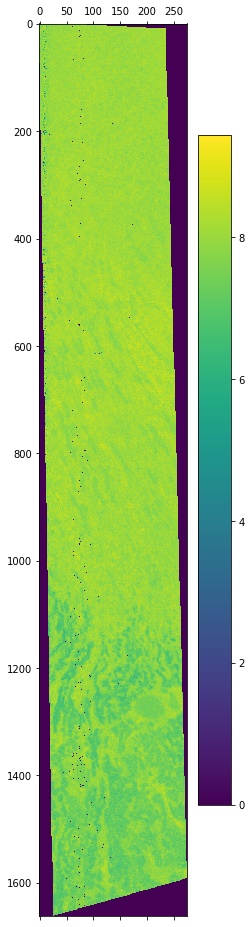

array([[8.0416047 , 7.91534045, 7.66255163, ..., 0.        , 0.        ,
        0.        ],
       [7.826759  , 7.97105276, 8.10086499, ..., 0.        , 0.        ,
        0.        ],
       [7.8626486 , 7.89041749, 7.62183374, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
male_spec.mass_heatmap(757)

2020-10-21 23:56:14,820  SpectraRegion  INFO: Processing Mass 805 with best existing mass 804.5512084960938


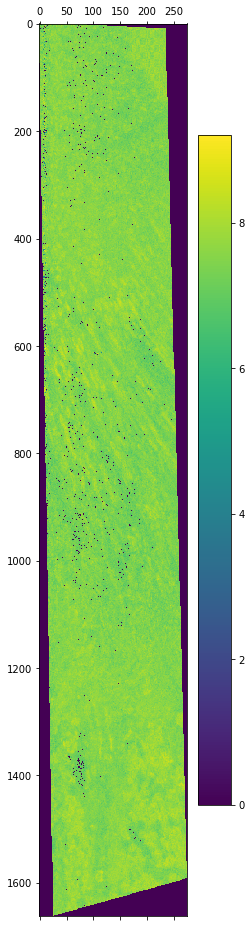

array([[7.40438044, 7.39078994, 7.53916921, ..., 0.        , 0.        ,
        0.        ],
       [6.91979149, 7.24952155, 7.59024147, ..., 0.        , 0.        ,
        0.        ],
       [7.00508668, 7.15395517, 6.87141476, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [39]:
male_spec.mass_heatmap(805)

2020-10-21 23:56:28,033  SpectraRegion  INFO: Processing Mass 833 with best existing mass 833.7094116210938


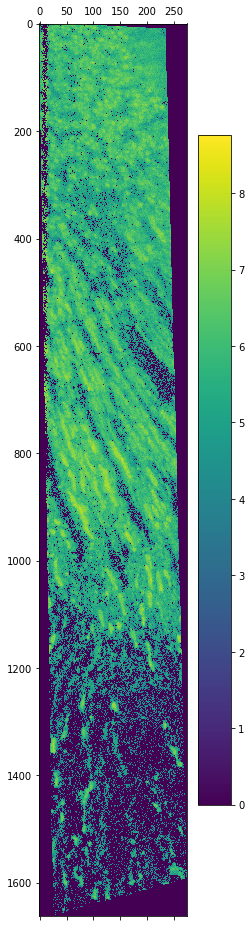

array([[3.662996  , 4.89330618, 5.71300692, ..., 0.        , 0.        ,
        0.        ],
       [4.98884137, 5.64292171, 4.73682458, ..., 0.        , 0.        ,
        0.        ],
       [5.51713113, 5.20342123, 5.03182007, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
male_spec.mass_heatmap(833)

In [ ]:
! ls /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML

In [ ]:
! rm /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML.regions

In [ ]:
imze_female = IMZMLExtract("/mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML")

In [ ]:
imze_female.list_regions()

In [ ]:
female_spectra2_orig = imze_female.get_region_array(2, makeNullLine=True)

In [ ]:
female_spectra2_intra = imze_female.normalize_region_array(female_spectra2_orig, normalize="intra_median")
female_spectra2 = imze_female.normalize_region_array(female_spectra2_intra, normalize="inter_median")

In [ ]:
female_spectra2_orig.shape

In [ ]:
imze_female.plot_fcs(female_spectra2_orig, [(150,100), (150,500), (150,900), (150, 1300)])

In [ ]:
imze_female.plot_fcs(female_spectra2, [(150,100), (150,500), (150,900), (150, 1300)])

In [ ]:
female_spec = SpectraRegion(np.log(female_spectra2+1), imze_female.mzValues)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
female_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [ ]:
female_spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=10000)

In [ ]:
#female_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=20000)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)

female_spec.plot_segments()

In [ ]:
female_spec.set_background(15)

In [ ]:
female_spec.plot_segments(highlight=2)

In [ ]:
female_spec.list_segment_counts()

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
female_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
combSpec = CombinedSpectra({"male": male_spec, "female": female_spec})

In [ ]:
combSpec.consensus_similarity()

In [ ]:
combSpec.consensus_similarity_matrix

In [ ]:
combSpec.plot_consensus_similarity()

In [ ]:
combSpec.cluster_concensus_spectra(number_of_clusters=5)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
combSpec.plot_common_segments()
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
male_clus = tuple(sorted([x for x in np.unique(male_spec.segmented) if x > 0]))
female_clus = tuple(sorted([x for x in np.unique(female_spec.segmented) if x > 0]))

In [ ]:
resdf, expr, pdata = combSpec.find_markers("male", male_clus, "female", [x for x in np.unique(female_spec.segmented) if x > 0], None, sample_max=10000, scaled=False)

In [ ]:
expkey=('male', male_clus, 'female', female_clus)
deresdf = resdf["rank"][expkey]

In [ ]:
deresdf

In [ ]:
combSpec.mass_intensity(818.5443, scaled=False)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
_ = combSpec.mass_heatmap(818.5443, scaled=False)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
from adjustText import adjust_text

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-deresdf["avg_logFC"]), list(-np.log10(deresdf["qvalue"])))]
dotgene = list(deresdf["gene_mass"])
texts = []
seenProts = set()
allYValues = set()
for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if y > 100:
        y = 100
        
    allYValues.add(y)
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

plt.ylim((0, 10+max(allYValues)))
        
if len(texts) > 0:
    adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()